In [1]:
# HIDDEN
# General Purpose
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from scipy.integrate import odeint
import matplotlib.ticker as ticker
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt


# Jupyter Specifics
from IPython.display import HTML
#from ipywidgets.widgets import interact, IntSlider, FloatSlider, Layout

import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual, IntSlider, FloatSlider, Layout


%matplotlib inline
matplotlib.rcParams['xtick.direction'] = 'out'
matplotlib.rcParams['ytick.direction'] = 'out'

style = {'description_width': '150px'}
slider_layout = Layout(width='99%')

In [2]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

In [3]:
# HIDDEN
# Set range
xr = 10
xl = -xr
yu = 10
yl = -yu

# Set x, y  points
npoints = 100
x = np.linspace(xl, xr, npoints)
y = np.linspace(yl, yu, npoints)
X, Y = np.meshgrid(x, y)

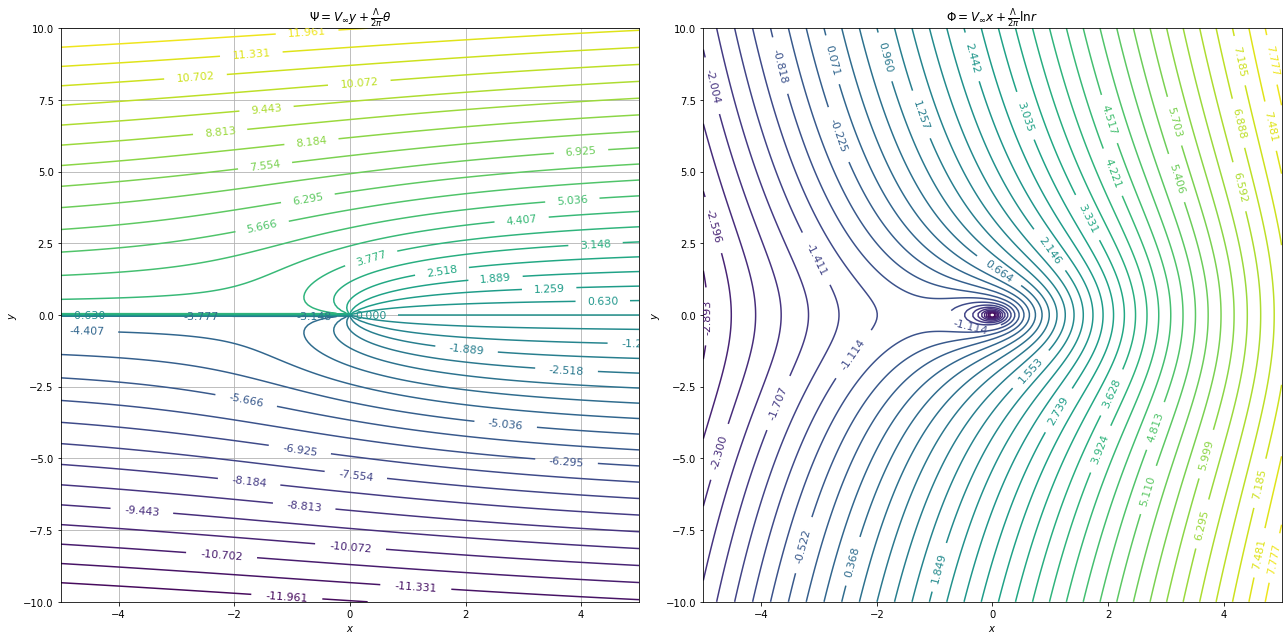

In [4]:
# HIDDEN
# Uniform Flow + Source

# Set freestream velocity
#Lambda = 2 * np.pi #  Set for convenience

Lambda = 8
Vinf = 1

plt.rcParams["figure.figsize"] = (18,9)


yu = 10;
yl = -yu

xl = -5
xr = 5

# Set x, y  points
npoints = 200
x = np.linspace(xl, xr, npoints*2)
y = np.linspace(yl, yu, npoints)

X, Y = np.meshgrid(x, y)

# Psi
plt.subplot(1,2,1)

Z = Vinf * Y + (Lambda)/(2 * np.pi) * np.arctan2(Y,X)
levels = np.linspace(np.min(Z),np.max(Z),41)
CS = plt.contour(X, Y, Z, levels=levels)
plt.clabel(CS, inline=1, fontsize=11)

plt.title(r'$\Psi = V_\infty y + \frac{\Lambda}{2 \pi} \theta$')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.grid()

#Phi
plt.subplot(1,2,2)
Z = Vinf * X + (Lambda)/(2 * np.pi) * np.log( np.sqrt(np.power(X,2) + np.power(Y,2)) )

#plt.contour(Z,np.linspace(Z.min(),Z.max(),15))
#levels = np.linspace(np.min(Z),0.0035,11)
levels = np.linspace(np.min(Z),np.max(Z),41)

CS = plt.contour(X, Y, Z, levels=levels)
#CS = plt.contour(X, Y, Z)
plt.clabel(CS, inline=1, fontsize=11)


plt.title(r'$\Phi = V_\infty x + \frac{\Lambda}{2 \pi} \ln r $')
plt.xlabel('$x$')
plt.ylabel('$y$')


plt.tight_layout()
plt.show()

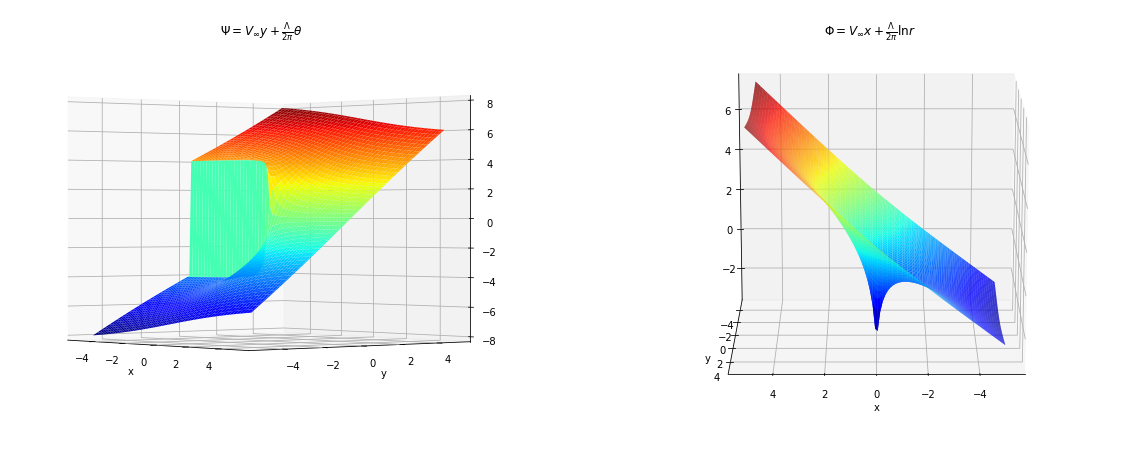

In [5]:
# HIDDEN
# Make data.
 # Set range
plt.rcParams["figure.figsize"] = (20,8)
xr = 5
xl = -xr
yu = 5
yl = -yu

# Set x, y  points
npoints = 100
x = np.linspace(xl, xr, npoints)
y = np.linspace(yl, yu, npoints)
X, Y = np.meshgrid(x, y) 

Vinf = 1
Lambda = 8
Z = Vinf * Y + (Lambda)/(2 * np.pi) * np.arctan2(Y,X)
Z2 = Vinf * X + (Lambda)/(2 * np.pi) * np.log( np.sqrt(np.power(X,2) + np.power(Y,2)) )

fig = plt.figure()
ax = fig.add_subplot(121, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap=cm.jet)
plt.title(r'$\Psi = V_\infty y + \frac{\Lambda}{2 \pi} \theta$')
plt.xlabel('x')
plt.ylabel('y')
ax.view_init(0, -40)

ax = fig.add_subplot(122, projection='3d')
surf = ax.plot_surface(X, Y, Z2, rstride=1, cstride=1, cmap=cm.jet)
plt.title(r'$\Phi = V_\infty x + \frac{\Lambda}{2 \pi} \ln r $')
plt.xlabel('x')
plt.ylabel('y')
ax.view_init(15, 90)
plt.show()

In [6]:
# HIDDEN
# Superposition of uniform Flow and source Flow interactive chart

def uniformAndSourcePlot(C, C2, Lambda):
    # Set freestream velocity
    Vinf = 1 # (units: m/s)
    fig, ax = plt.subplots(figsize=(15, 10)) 
    # Set range
    xr = 10
    xl = -xr
    yu = 10
    yl = -yu
       
    # Set x, y  points
    npoints = 100
    x = np.linspace(xl, xr, npoints)
    y = np.linspace(yl, yu, npoints)
    X, Y = np.meshgrid(x, y)
    
    
    Z = Vinf * Y + (Lambda)/(2 * np.pi) * np.arctan2(Y,X)
    CS = plt.contour(X, Y, Z, levels=[C])
    fmt='%1.4f'
    plt.clabel(CS, inline=1, fontsize=16, fmt=fmt)
    

    Z = Vinf * X + (Lambda)/(2 * np.pi) * np.log( np.sqrt(np.power(X,2) + np.power(Y,2)) )
    CS2 = plt.contour(X, Y, Z, levels=[C2], colors='k',linestyles='dashed')
    plt.clabel(CS2, inline=1, fontsize=16, fmt=fmt)
    
#     plt.title(r'$\Psi = V_\infty y + \frac{\Lambda}{2 \pi} \theta$   and   $\Phi = V_\infty x + \frac{\Lambda}{2 \pi} \ln r $')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.tight_layout()
    plt.show()

In [7]:
# HIDDEN
interactive_plot = interactive(uniformAndSourcePlot, 
                               C=widgets.FloatSlider(value=1,min=-10,max=10,step=0.2,description=r'$\Psi = V_\infty y + \frac{\Lambda}{2 \pi} \theta$', style=style, layout=slider_layout), 
                               C2=widgets.FloatSlider(value=-0.8,min=-10,max=10,step=0.2,description=r'$\Phi = V_\infty x + \frac{\Lambda}{2 \pi} \ln r $', style=style, layout=slider_layout), 
                               Lambda=widgets.FloatSlider(value=8,min=0.5,max=10,step=0.5,description=r'$\Lambda$', style=style, layout=slider_layout));

interactive_plot.children[0].readout_format = '.4f'
interactive_plot.children[1].readout_format = '.4f'
interactive_plot.children[2].readout_format = '.4f'
interactive_plot

interactive(children=(FloatSlider(value=1.0, description='$\\Psi = V_\\infty y + \\frac{\\Lambda}{2 \\pi} \\th…